In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret.regression as pycReg

In [3]:
df = pd.read_csv('data/data_df.csv')

In [4]:
column_name = list(df.columns)
df.shape

(117, 11)

In [5]:
#setup model
model = pycReg.setup(data = df, 
                    target = 'target',
                    train_size=0.7,
                    normalize=True,
                    verbose=False,
                    numeric_features=list(df.drop(['target'], axis=1).columns),
                    silent = True)

In [7]:
# #compare models
# pycReg.compare_models(sort = "RMSE")

In [7]:
#create model
catB = pycReg.create_model('catboost', verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4876,0.5233,0.7234,0.1523,-0,0.3354
1,0.8954,1.438,1.199,0.2265,-0,0.3376
2,0.85,1.035,1.017,-1.07,-0,0.2897
3,0.4961,0.3119,0.5585,0.8202,-0,0.2412
4,0.3968,0.3053,0.5525,0.7876,-0,0.1287
5,0.6188,0.7743,0.88,0.5535,-0,0.1572
6,0.6248,0.5027,0.709,0.8161,-0,0.227
7,0.6177,0.5293,0.7275,0.4707,-0,0.4116
8,0.7389,0.7624,0.8731,0.4697,-0,0.3585
9,0.5841,0.4916,0.7012,0.6017,-0,0.4588


In [30]:
# #tune model
# catB = pycReg.tune_model(catB, optimize = "RMSE", n_iter = 500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6092,0.7782,0.8822,0.4997,-0,0.2225
1,0.5879,0.9022,0.9499,0.5343,-0,0.3182
2,0.8397,0.9176,0.9579,0.4299,-0,0.5164
3,0.4056,0.2354,0.4852,0.8537,-0,0.272
4,0.6993,0.6825,0.8261,0.61,-0,0.3929
5,0.4707,0.461,0.6789,0.6793,-0,0.1679
6,0.3187,0.1502,0.3876,0.8646,-0,0.2186
7,0.4448,0.3127,0.5592,0.2852,-0,0.3101
8,0.5214,0.3974,0.6304,0.6821,-0,0.2214
9,0.6065,0.4869,0.6978,0.3508,-0,0.2221


In [8]:
import shap
explainer = shap.TreeExplainer(catB)
shap_values = explainer.shap_values(df.drop(['target'], axis=1).values)

In [9]:
shap_values.shape

(117, 10)

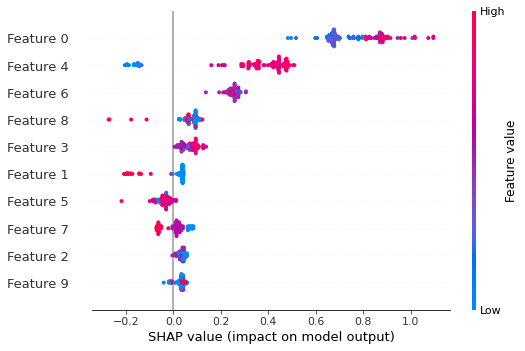

In [10]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values, show=None)
plt.savefig('figures/shap_impact_model8.png')

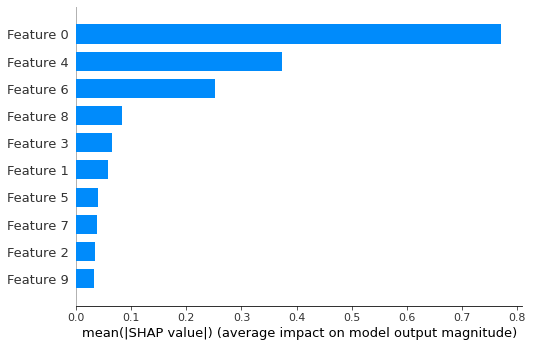

In [11]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values, plot_type='bar', show=None)
plt.savefig('figures/shap_contribution_model8.png')